In [1]:
import fitsio
import lusee
import healpy as hp
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
sky = lusee.sky.FitsSky("../simulation/sky_data/ULSA_32_ddi_smooth.fits",lmax=1)
skymeans = sky.maps.mean(axis=1)
freq = sky.freq_list

In [11]:
import astropy.units as u
T_NB= lusee.monosky.T_NB(freq)
T_C= lusee.monosky.T_C(freq)

[]

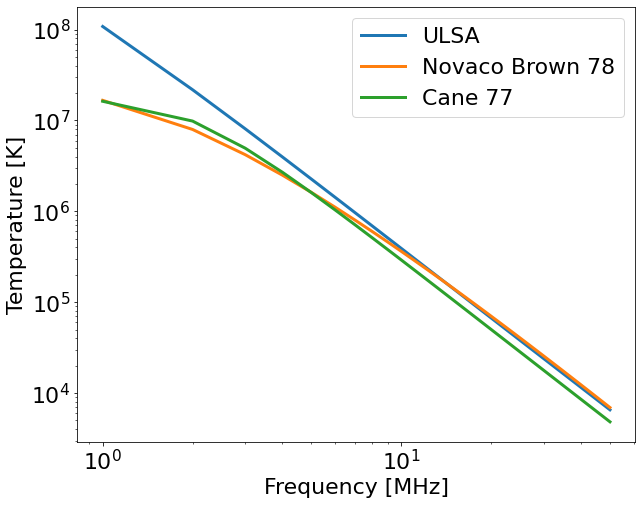

In [50]:
plt.figure(figsize=(10,8))
plt.plot(freq,skymeans,label='ULSA',lw=3)
plt.plot(freq,T_NB,label="Novaco Brown 78",lw=3)
plt.plot(freq,T_C,label="Cane 77",lw=3)
plt.plot()
plt.xlabel('Frequency [MHz]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.loglog()

In [37]:
dataE = fitsio.read('../simulation/output/sim_v1.fits')
dataRS = fitsio.read('../simulation/output/sim_v1_rsig.fits')
#dataC = fitsio.read('../simulation/output/sim_v1_csky.fits')
#dataGC = fitsio.read('../simulation/output/sim_v1_gcen.fits')
#dataS = fitsio.read('../simulation/output/sim_v1_slat.fits')
#data32 = fitsio.read('../simulation/output/sim_v1_lmax32.fits')
#dataC200 = fitsio.read('../simulation/output/sim_v1_const200.fits')
#data.shape

Text(0, 0.5, '$V_{ij}\\ [K]$')

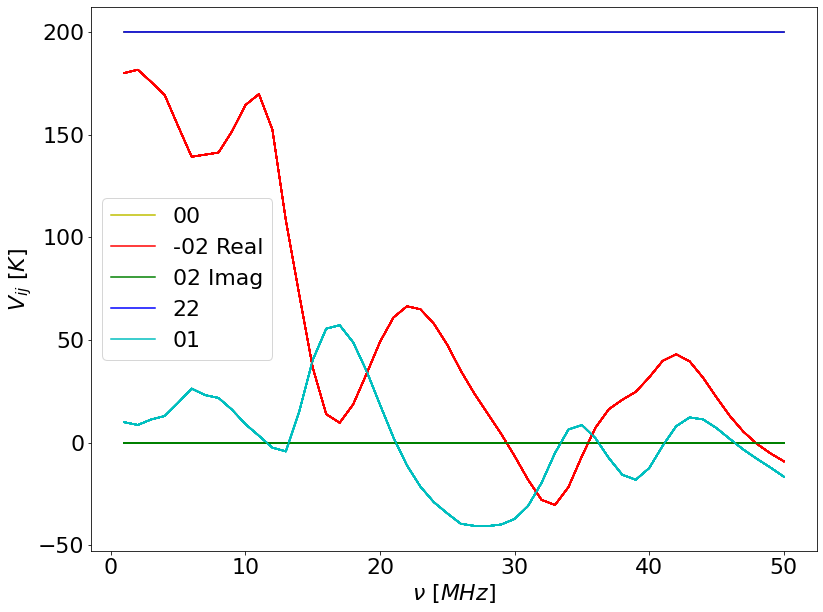

In [148]:
plt.figure(figsize=(13,10))
xa = lambda x:x
for daydata in dataC200:
    plt.plot(freq,daydata[0,:],'y-', label = xa('00'))
    plt.plot(freq,-daydata[1,:],'r-', label = xa('-02 Real'))
    plt.plot(freq,daydata[2,:],'g-', label = xa('02 Imag'))
    plt.plot(freq,daydata[3,:],'b-', label = xa('22'))
    plt.plot(freq,daydata[4,:],'c-', label = xa('01'))
    #plt.plot(freq,daydata[3,:]+daydata[0,:]-2*daydata[1,:],'c-', label = xa('PP'))
    xa = lambda x: None
plt.legend()
plt.xlabel('$\\nu\ [MHz]$')
plt.ylabel('$V_{ij}\ [K]$')
#plt.semilogy()

Text(0, 0.5, 'V_ij [K]  $\\times (\\nu/10MHz)^{2.5}$')

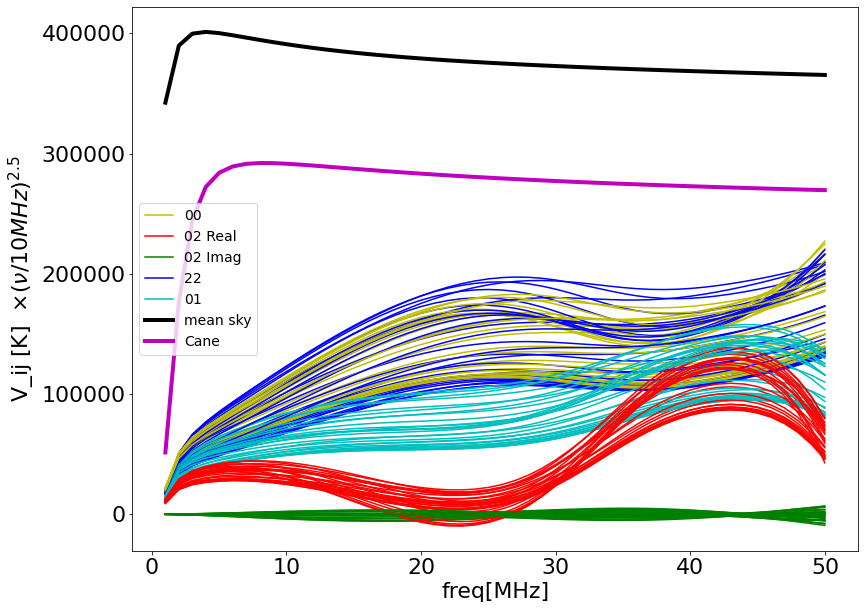

In [51]:
w = (freq/10)**2.5
plt.figure(figsize=(13,10))
xa = lambda x:x
for daydata in dataE:
    plt.plot(freq,w*daydata[0,:],'y-', label = xa('00'))
    plt.plot(freq,w*daydata[1,:],'r-', label = xa('02 Real'))
    plt.plot(freq,w*daydata[2,:],'g-', label = xa('02 Imag'))
    plt.plot(freq,w*daydata[3,:],'b-', label = xa('22'))
    plt.plot(freq,w*daydata[4,:],'c-', label = xa('01'))
    xa = lambda x: None
plt.plot(freq,skymeans*w,'k-',lw=4,label='mean sky')
plt.plot(freq,T_C*w,'m-',lw=4, label='Cane')
plt.legend(fontsize=14)
plt.xlabel('freq[MHz]')
plt.ylabel('V_ij [K]  $\\times (\\nu/10MHz)^{2.5}$')
#plt.semilogy()


Text(0, 0.5, 'lmax=64 / lmax = 32 ')

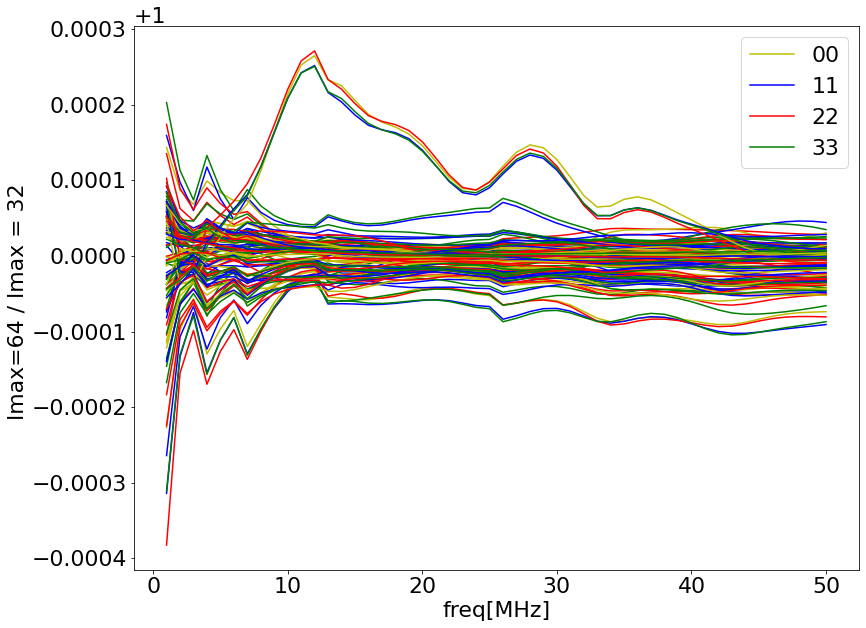

In [172]:
w = 1#(freq/10)**2.5
plt.figure(figsize=(13,10))
xa = lambda x:x
#data = dataE/dataS
data = dataE/data32
for daydata in data:
    plt.plot(freq,daydata[0,:]*w,'y-', label = xa('00'))
    #plt.plot(freq,np.abs(daydata[1,:]*w),'r-', label = xa('-02 Real'))
    #plt.plot(freq,daydata[2,:]*w,'g-', label = xa('02 Imag'))
    plt.plot(freq,daydata[6,:]*w,'b-', label = xa('11'))
    plt.plot(freq,daydata[3,:]*w,'r-', label = xa('22'))
    plt.plot(freq,daydata[9,:]*w,'g-', label = xa('33'))
    xa = lambda x: None
#plt.plot(freq,skymeans*w,'k-',lw=4)
#plt.plot(freq,TskyApprox(freq)*w,'c-',lw=4)
plt.legend()
plt.xlabel('freq[MHz]')
#plt.ylabel('lat=-30 / lat = 0 ')
plt.ylabel('lmax=64 / lmax = 32 ')
#plt.semilogy()


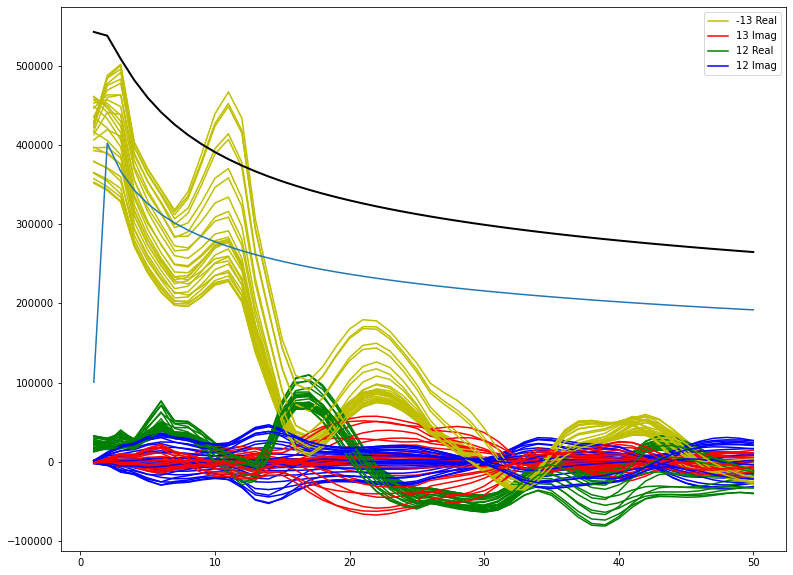

In [49]:
w = (freq/10)**2.3
plt.figure(figsize=(13,10))
xa = lambda x:x
for daydata in data:
    plt.plot(freq,-daydata[4,:]*w,'y-',label = xa('-13 Real'))
    plt.plot(freq,daydata[5,:]*w,'r-', label = xa('13 Imag'))
    plt.plot(freq,daydata[6,:]*w,'g-', label = xa('12 Real'))
    plt.plot(freq,daydata[7,:]*w,'b-', label = xa('12 Imag'))
    xa = lambda x: None
plt.plot(freq,skymeans*w,'k-',lw=2)
plt.plot(freq,TskyApprox(freq)*w)
plt.legend()
#plt.loglog()

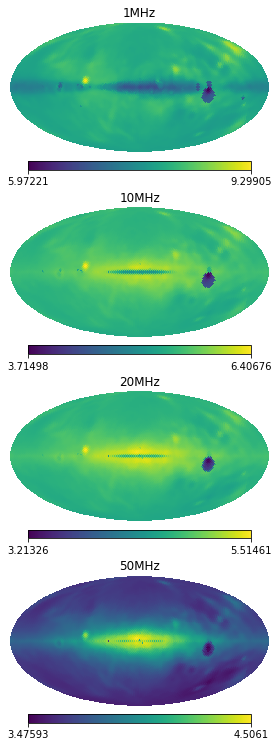

In [125]:
#fix, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2,2)
#ax=[ax1,ax2,ax3,ax4]
#ax= ax[0]+ax[1]
#for cax,j in zip(ax,[0,9,29,30]):
#plt.axis(ax1)
plt.figure(figsize=(8,13))
for i,j in enumerate([0,9,19,49]):
    plt.subplot(4,1,i+1)
    hp.mollview(np.log10(sky.maps[j]),title=f"{j+1}MHz",hold=True)

In [103]:
hp.mollview?


Text(0, 0.5, 'V_ij [K]  $\\times (\\nu/10MHz)^{2.5}$')

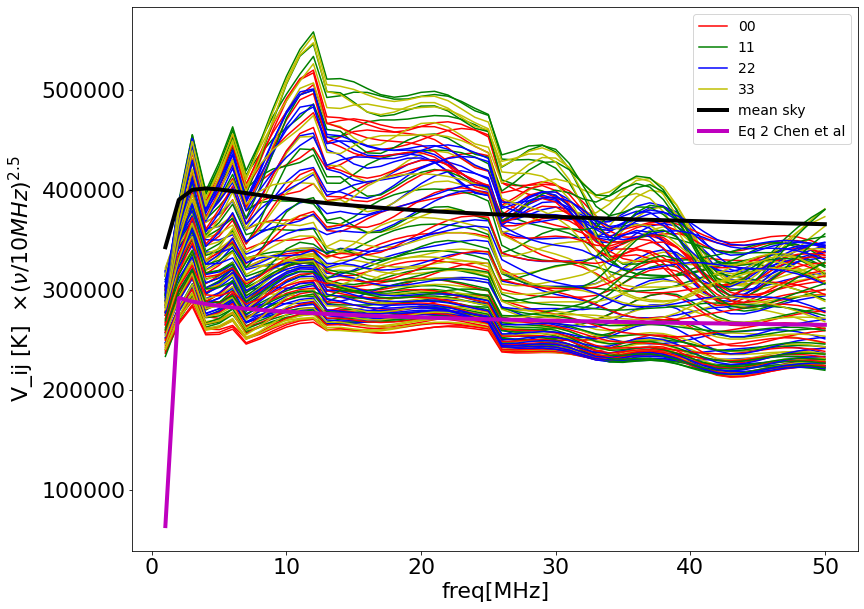

In [166]:
w = (freq/10)**2.5
plt.figure(figsize=(13,10))
xa = lambda x:x
for daydata in dataE:
    plt.plot(freq,w*daydata[0,:],'r-', label = xa('00'))
    plt.plot(freq,w*daydata[6,:],'g-', label = xa('11'))
    plt.plot(freq,w*daydata[3,:],'b-', label = xa('22'))
    plt.plot(freq,w*daydata[9,:],'y-', label = xa('33'))
    xa = lambda x: None
plt.plot(freq,skymeans*w,'k-',lw=4,label='mean sky')
plt.plot(freq,TskyApprox(freq)*w,'m-',lw=4, label='Eq 2 Chen et al')
plt.legend(fontsize=14)
plt.xlabel('freq[MHz]')
plt.ylabel('V_ij [K]  $\\times (\\nu/10MHz)^{2.5}$')

Text(0, 0.5, 'V_ij [K]  $\\times (\\nu/10MHz)^{2.5}$')

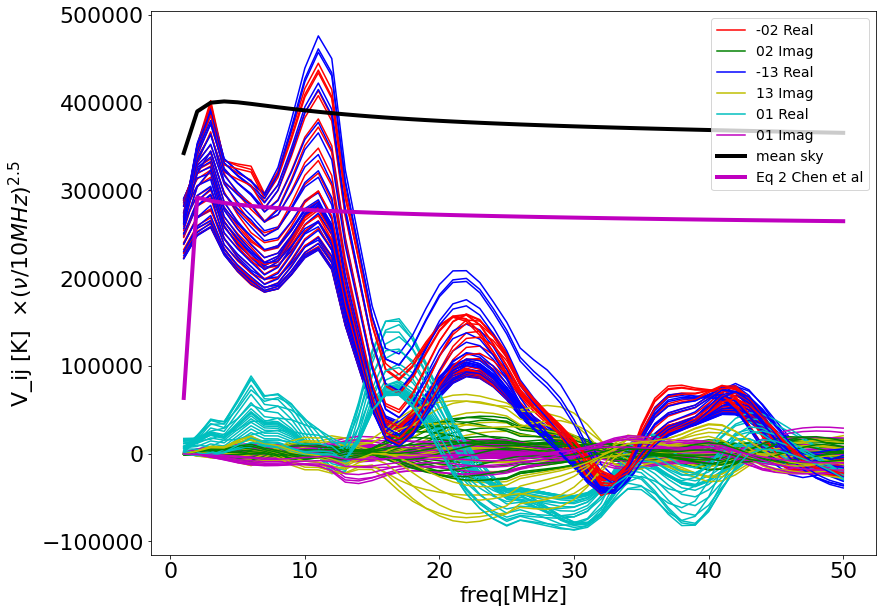

In [170]:
w = (freq/10)**2.5
plt.figure(figsize=(13,10))
xa = lambda x:x
for daydata in dataE:
    plt.plot(freq,-w*daydata[1,:],'r-', label = xa('-02 Real'))
    plt.plot(freq,w*daydata[2,:],'g-', label = xa('02 Imag'))
    plt.plot(freq,-w*daydata[7,:],'b-', label = xa('-13 Real'))
    plt.plot(freq,w*daydata[8,:],'y-', label = xa('13 Imag'))
    plt.plot(freq,w*daydata[4,:],'c-', label = xa('01 Real'))
    plt.plot(freq,w*daydata[5,:],'m-', label = xa('01 Imag'))
    xa = lambda x: None
plt.plot(freq,skymeans*w,'k-',lw=4,label='mean sky')
plt.plot(freq,TskyApprox(freq)*w,'m-',lw=4, label='Eq 2 Chen et al')
plt.legend(fontsize=14)
plt.xlabel('freq[MHz]')
plt.ylabel('V_ij [K]  $\\times (\\nu/10MHz)^{2.5}$')